# Perturbing gene expression in malignant cells

In [1]:
import importlib
import logging

import helpers
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from upath import UPath

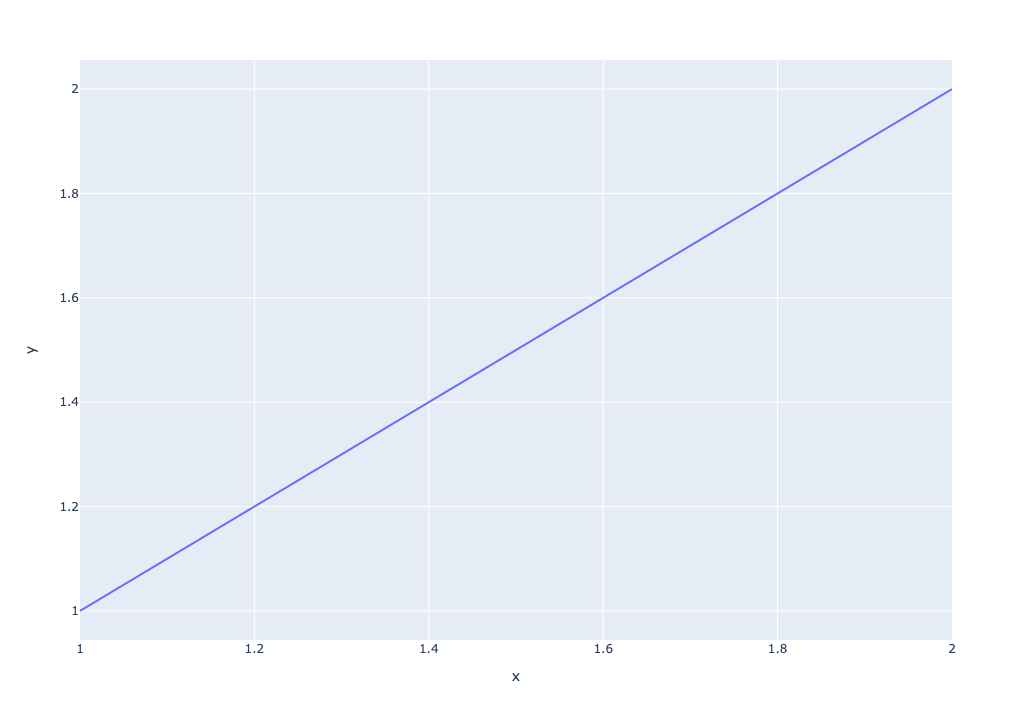

In [2]:
# janky plotly hack
px.line(x=[1, 2], y=[1, 2]).show(height=100, width=100)

In [3]:
helpers.logging.configure_logging()
logging.getLogger("helpers").setLevel("DEBUG")

In [4]:
logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")
logger.debug("test")

2022-11-01 08:00:47,049 29139/MainThread __main__ DEBUG
test


In [73]:
path_root = (
    UPath("gs://liulab/run_everything")
    # / "20221028_21h18m11s"
    / "20221101_08h45m56s"
)

In [74]:
!gsutil ls -hl {path_root / "log2_fc=-2.000" / "deg_analysis"}

664.55 KiB  2022-11-01T08:56:38Z  gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-2.000/deg_analysis/gene_stats_bulk.parquet
587.95 KiB  2022-11-01T08:57:07Z  gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-2.000/deg_analysis/gene_stats_malignant_cibersortx.parquet
TOTAL: 2 objects, 1282560 bytes (1.22 MiB)


In [75]:
p = path_root / "log2_fc=-2.000/deg_analysis/gene_stats_malignant_cibersortx.parquet"
pd.read_parquet(p)

gene_symbol      pval  fold_change  sparsity_overall  -log10_pval  \
0            A1BG  0.855044     1.052402               0.0     0.068011   
1             A2M  0.748542     1.042335               0.0     0.125784   
2           A2ML1  0.484100     0.880120               0.0     0.315064   
3          A4GALT  1.000000     1.000000               0.0    -0.000000   
4           A4GNT  1.000000     1.000000               0.0    -0.000000   
...           ...       ...          ...               ...          ...   
16058      ZYG11A  0.148667     0.881648               0.0     0.827785   
16059      ZYG11B  0.357403     0.933528               0.0     0.446842   
16060         ZYX  0.164801     1.169966               0.0     0.783040   
16061       ZZEF1  0.991749     1.025472               0.0     0.003598   
16062        ZZZ3  0.007102     0.674308               0.0     2.148637   

       log2_fold_change  -log10_pval_signed  significant_bh_fdr=0.10  \
0              0.073686            0.068011                    False   
1              0.059819            0.125784                    False   
2             -0.184228           -0.315064                    False   
3              0.000000           -0.000000                    False   
4              0.000000           -0.000000                    False   
...                 ...                 ...                      ...   
16058         -0.181725           -0.827785                    False   
16059         -0.099236           -0.446842                    False   
16060          0.226467            0.783040                    False   
16061          0.036288            0.003598                    False   
16062         -0.568520           -2.148637                    False   

       significant_bh_fdr=0.25  perturbed  
0                        False      False  
1                        False      False  
2                        False      False  
3                        False      False  
4                        False      False  
...                        ...        ...  
16058                    False      False  
16059                    False      False  
16060                    False      False  
16061                    False      False  
16062                    False      False  

[16063 rows x 10 columns]

## differential expression analysis

## individial plots

In [361]:
# experiment_paths = [path_root / "log2_fc=0.000"]  # control
# title = "Negative control"

# experiment_paths = [path_root / "log2_fc=2.000"]
# title = "$\log_{2} [FC] = 2.0$"

experiment_paths = [
    path_root / "log2_fc=0.000",
    path_root / "log2_fc=-0.250",
    path_root / "log2_fc=-0.500",
    path_root / "log2_fc=-1.000",
    path_root / "log2_fc=-1.500",
]
title = ""

experiment_paths

[GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=0.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-0.250'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-0.500'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-1.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-1.500')]

In [362]:
importlib.reload(helpers.running_cibersortx.reading_output_files)

from helpers.running_cibersortx.reading_output_files import read_hires_cell_type_gep

key_names = ["experiment_name", "data_origin"]

experiments_data = dict()
for path in experiment_paths:
    experiments_data[(path.name, "bulk RNA-seq")] = pd.read_parquet(
        path / "deg_analysis/gene_stats_bulk.parquet"
    )
    experiments_data[(path.name, "malignant cells (cibersortx)")] = pd.read_parquet(
        path / "deg_analysis/gene_stats_malignant_cibersortx.parquet"
    )

all_dge_results = (
    pd.concat(experiments_data, names=key_names).reset_index(key_names).reset_index(drop=True)
)

2022-11-01 13:40:20,187 29139/MainThread helpers.deg_analysis DEBUG
adding data for k=0, row_number=1, column_number=1
2022-11-01 13:40:20,198 29139/MainThread helpers.deg_analysis DEBUG
-log10(pval_threshold) for alpha=0.1, key=('log2_fc=0.000', 'Bulk simulated'):, 5.506856655023323
2022-11-01 13:40:20,217 29139/MainThread helpers.deg_analysis DEBUG
-log10(pval_threshold) for alpha=0.25, key=('log2_fc=0.000', 'Bulk simulated'):, 5.108916646351285
2022-11-01 13:40:20,228 29139/MainThread helpers.deg_analysis DEBUG
adding data for k=0, row_number=2, column_number=1
2022-11-01 13:40:20,238 29139/MainThread helpers.deg_analysis DEBUG
-log10(pval_threshold) for alpha=0.1, key=('log2_fc=0.000', 'Malignant inferred'):, 5.506856655023323
2022-11-01 13:40:20,260 29139/MainThread helpers.deg_analysis DEBUG
-log10(pval_threshold) for alpha=0.25, key=('log2_fc=0.000', 'Malignant inferred'):, 5.108916646351285
2022-11-01 13:40:20,273 29139/MainThread helpers.deg_analysis DEBUG
adding data for k=1,

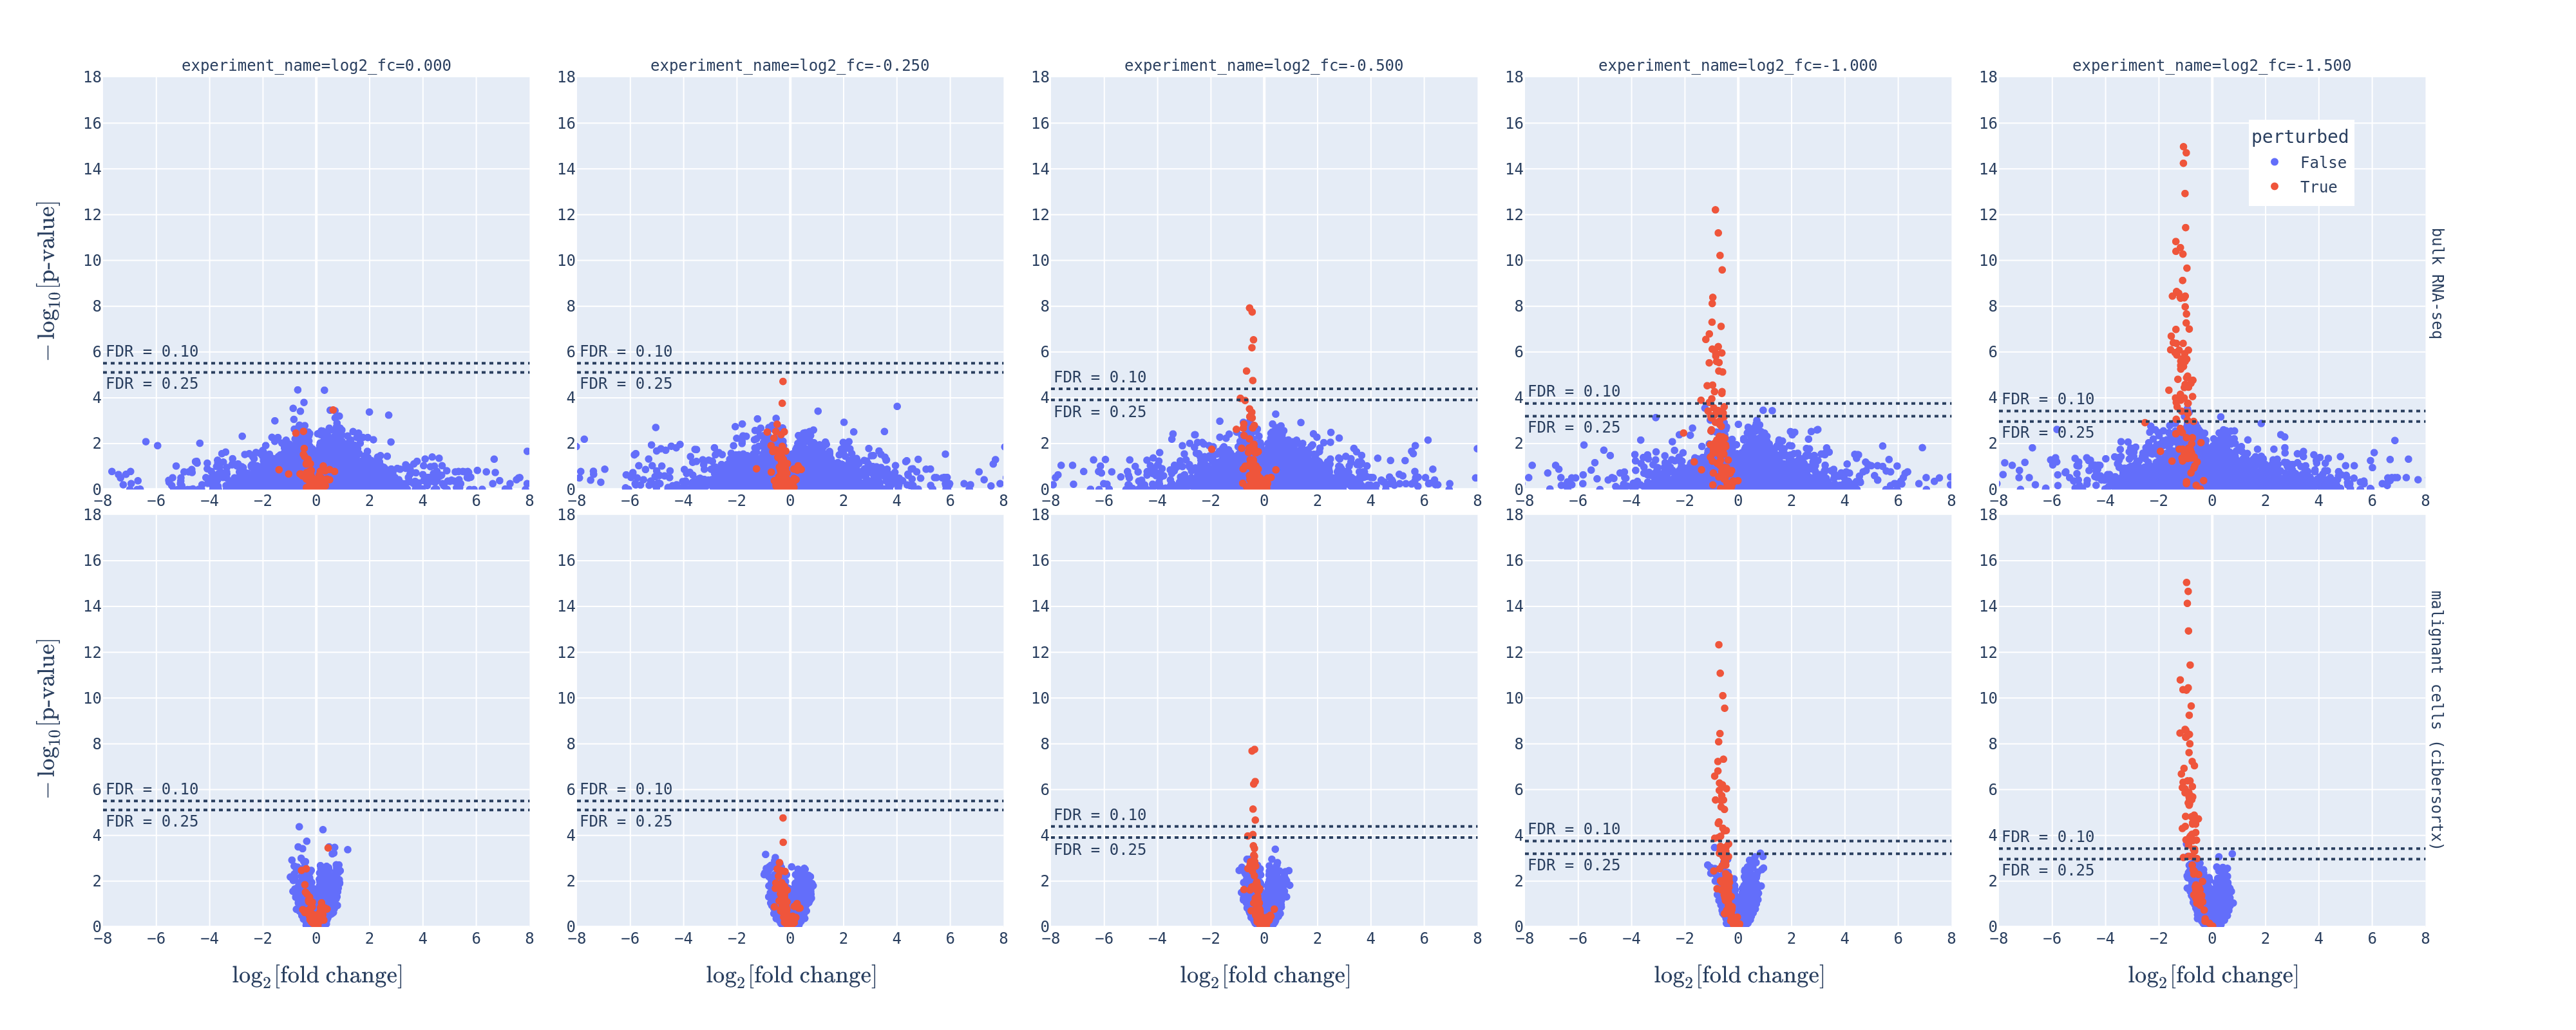

In [363]:
importlib.reload(helpers.deg_analysis)

from helpers.deg_analysis import add_fdr_lines, make_volcano_facets

fig = make_volcano_facets(all_dge_results, horizontal=True)
fig = add_fdr_lines(fig, all_dge_results, horizontal=True)
# fig.update_layout(title=title, height=1200)
fig.show(renderer="png", scale=2)

In [301]:
all_dge_results

experiment_name                   data_origin gene_symbol      pval  \
0       log2_fc=0.000                  bulk RNA-seq        A1BG  0.532699   
1       log2_fc=0.000                  bulk RNA-seq         A2M  0.931329   
2       log2_fc=0.000                  bulk RNA-seq       A2ML1  0.975252   
3       log2_fc=0.000                  bulk RNA-seq      A4GALT  0.242525   
4       log2_fc=0.000                  bulk RNA-seq       A4GNT  0.500270   
...               ...                           ...         ...       ...   
64247   log2_fc=2.000  malignant cells (cibersortx)      ZYG11A  0.262609   
64248   log2_fc=2.000  malignant cells (cibersortx)      ZYG11B  0.717408   
64249   log2_fc=2.000  malignant cells (cibersortx)         ZYX  0.040276   
64250   log2_fc=2.000  malignant cells (cibersortx)       ZZEF1  0.152583   
64251   log2_fc=2.000  malignant cells (cibersortx)        ZZZ3  0.622078   

       fold_change  sparsity_overall  -log10_pval  log2_fold_change  \
0         0.755190              0.00     0.273518         -0.405089   
1         1.008809              0.00     0.030897          0.012653   
2         0.975304              0.00     0.010883         -0.036077   
3         1.057925              0.07     0.615244          0.081237   
4         1.063229              0.92     0.300795          0.088452   
...            ...               ...          ...               ...   
64247     0.920667              0.00     0.580690         -0.119249   
64248     0.975590              0.00     0.144234         -0.035653   
64249     1.275286              0.00     1.394958          0.350820   
64250     1.229943              0.00     0.816494          0.298591   
64251     0.924014              0.00     0.206156         -0.114013   

       -log10_pval_signed  significant_bh_fdr=0.10  significant_bh_fdr=0.25  \
0               -0.273518                    False                    False   
1                0.030897                    False                    False   
2               -0.010883                    False                    False   
3                0.615244                    False                    False   
4                0.300795                    False                    False   
...                   ...                      ...                      ...   
64247           -0.580690                    False                    False   
64248           -0.144234                    False                    False   
64249            1.394958                    False                    False   
64250            0.816494                    False                    False   
64251           -0.206156                    False                    False   

       perturbed  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
64247      False  
64248      False  
64249      False  
64250      False  
64251      False  

[64252 rows x 12 columns]

In [292]:
gene_stats_malignant_cibersortx = all_dge_results.query(
    "data_origin == 'malignant cells (cibersortx)'"
)
y = gene_stats_malignant_cibersortx["perturbed"]
y_score = gene_stats_malignant_cibersortx["-log10_pval"]

(1745,) (1745,) (1745,)


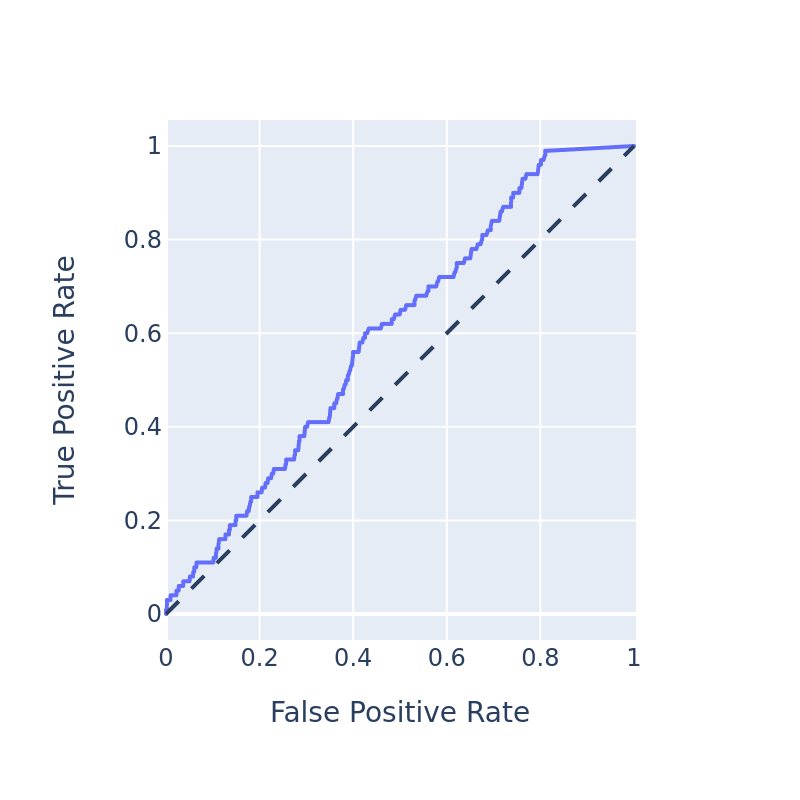

In [293]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y, y_score)

print(fpr.shape, tpr.shape, thresholds.shape)

fig = px.line(
    x=fpr,
    y=tpr,
    # title=f"ROC Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(x="False Positive Rate", y="True Positive Rate"),
    width=400,
    height=400,
    hover_data={"Threshold of -log10(pval)": thresholds},
)
fig.add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1, dtick=0.2)
fig.update_xaxes(constrain="domain", dtick=0.2)
fig.show(renderer="png", scale=2)

(5313,) (5313,) (5312,)


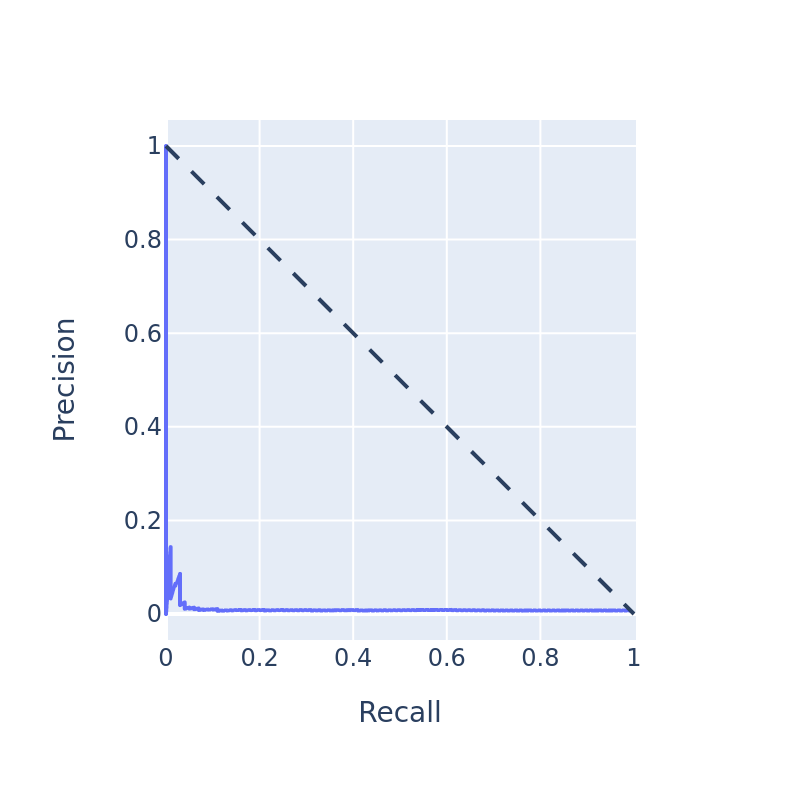

In [294]:
from sklearn.metrics import auc, precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, y_score)

print(precision.shape, recall.shape, thresholds.shape)

fig = px.line(
    x=recall[1:],
    y=precision[1:],
    # title=f"Precision & Recall",
    labels=dict(x="Recall", y="Precision"),
    width=400,
    height=400,
    hover_data={"Threshold of -log10(pval)": thresholds},
)
fig.add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=1, y1=0)
fig.update_yaxes(scaleanchor="x", scaleratio=1, dtick=0.2)
fig.update_xaxes(constrain="domain", dtick=0.2)
# fig.update_xaxes(minor=dict(showgrid=True))
# fig.update_yaxes(minor=dict(showgrid=True))
fig.show(renderer="png", scale=2)

## multiple fold-changes

In [307]:
experiment_paths = list(path_root.glob("log2_fc=*"))
experiment_paths = list(sorted(experiment_paths, key=lambda p: float(str(p).split("=")[1])))
experiment_paths

[GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-3.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-2.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-1.500'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-1.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-0.500'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=-0.250'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=0.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=0.250'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=0.500'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=1.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=1.500'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=2.000'),
 GCSPath('gs://liulab/run_everything/20221101_08h45m56s/log2_fc=3.000')]

In [318]:
importlib.reload(helpers.running_cibersortx.reading_output_files)

from helpers.running_cibersortx.reading_output_files import read_hires_cell_type_gep
from sklearn.metrics import auc, precision_recall_curve, roc_curve

key_names = ["experiment_name", "data_origin"]

df_roc = pd.DataFrame()
df_pr = pd.DataFrame()

experiments_data = dict()
for i, path in enumerate(experiment_paths):
    # experiments_data[(path.name, "bulk RNA-seq")] = pd.read_parquet(path / "deg_analysis/gene_stats_bulk.parquet")
    # experiments_data[(path.name, "malignant cells (cibersortx)")]
    df = pd.read_parquet(path / "deg_analysis/gene_stats_malignant_cibersortx.parquet")
    y = df["perturbed"]
    y_score = df["-log10_pval"]
    fpr, tpr, thresholds = roc_curve(y, y_score)
    # print(fpr.shape, tpr.shape, thresholds.shape)
    description = f"{path.name} (AUC={auc(fpr, tpr):.4f})"
    df_roc_this_experiment = pd.DataFrame(
        dict(
            description=description,
            fpr=fpr,
            tpr=tpr,
            thresholds=thresholds,
            color=np.linspace(-2, 2, len(experiment_paths))[i],
        )
    )
    df_roc = pd.concat([df_roc, df_roc_this_experiment])
    precision, recall, thresholds = precision_recall_curve(y, y_score)
    print(precision.shape, recall.shape, thresholds.shape)
    df_pr_this_experiment = pd.DataFrame(
        dict(
            description=path.name,
            precision=precision[1:],
            recall=recall[1:],
            thresholds=thresholds,
            color=np.linspace(-2, 2, len(experiment_paths))[i],
        )
    )
    df_pr = pd.concat([df_pr, df_pr_this_experiment])


# all_dge_results = pd.concat(experiments_data, names=key_names).reset_index(key_names).reset_index(drop=True)

(5214,) (5214,) (5213,)
(5504,) (5504,) (5503,)
(5434,) (5434,) (5433,)
(4799,) (4799,) (4798,)
(5161,) (5161,) (5160,)
(5016,) (5016,) (5015,)
(5313,) (5313,) (5312,)
(5125,) (5125,) (5124,)
(5439,) (5439,) (5438,)
(5392,) (5392,) (5391,)
(5180,) (5180,) (5179,)
(4785,) (4785,) (4784,)
(4953,) (4953,) (4952,)


In [319]:
df_roc

description       fpr   tpr  thresholds  color
0     log2_fc=-3.000 (AUC=0.9800)  0.000000  0.00   16.769609   -2.0
1     log2_fc=-3.000 (AUC=0.9800)  0.000000  0.01   15.769609   -2.0
2     log2_fc=-3.000 (AUC=0.9800)  0.000000  0.03   15.744591   -2.0
3     log2_fc=-3.000 (AUC=0.9800)  0.000000  0.30    8.893117   -2.0
4     log2_fc=-3.000 (AUC=0.9800)  0.000000  0.32    8.800155   -2.0
...                           ...       ...   ...         ...    ...
1602   log2_fc=3.000 (AUC=0.9382)  0.798659  0.99    0.001197    2.0
1603   log2_fc=3.000 (AUC=0.9382)  0.798785  0.99    0.001196    2.0
1604   log2_fc=3.000 (AUC=0.9382)  0.798973  0.99    0.001196    2.0
1605   log2_fc=3.000 (AUC=0.9382)  0.801792  0.99    0.001196    2.0
1606   log2_fc=3.000 (AUC=0.9382)  1.000000  1.00   -0.000000    2.0

[22011 rows x 5 columns]

In [320]:
df_pr

description  precision  recall  thresholds  color
0     log2_fc=-3.000   0.007692    1.00   -0.000000   -2.0
1     log2_fc=-3.000   0.007727    1.00    0.001196   -2.0
2     log2_fc=-3.000   0.007728    1.00    0.001196   -2.0
3     log2_fc=-3.000   0.007730    1.00    0.001198   -2.0
4     log2_fc=-3.000   0.007730    1.00    0.001200   -2.0
...              ...        ...     ...         ...    ...
4947   log2_fc=3.000   1.000000    0.04   15.052354    2.0
4948   log2_fc=3.000   1.000000    0.03   15.470738    2.0
4949   log2_fc=3.000   1.000000    0.02   16.071412    2.0
4950   log2_fc=3.000   1.000000    0.01   16.274244    2.0
4951   log2_fc=3.000   1.000000    0.00   16.916494    2.0

[67302 rows x 5 columns]

In [346]:
n_colors = df_roc["description"].nunique()
colors = px.colors.sample_colorscale("Picnic", [n / (n_colors - 1) for n in range(n_colors)])

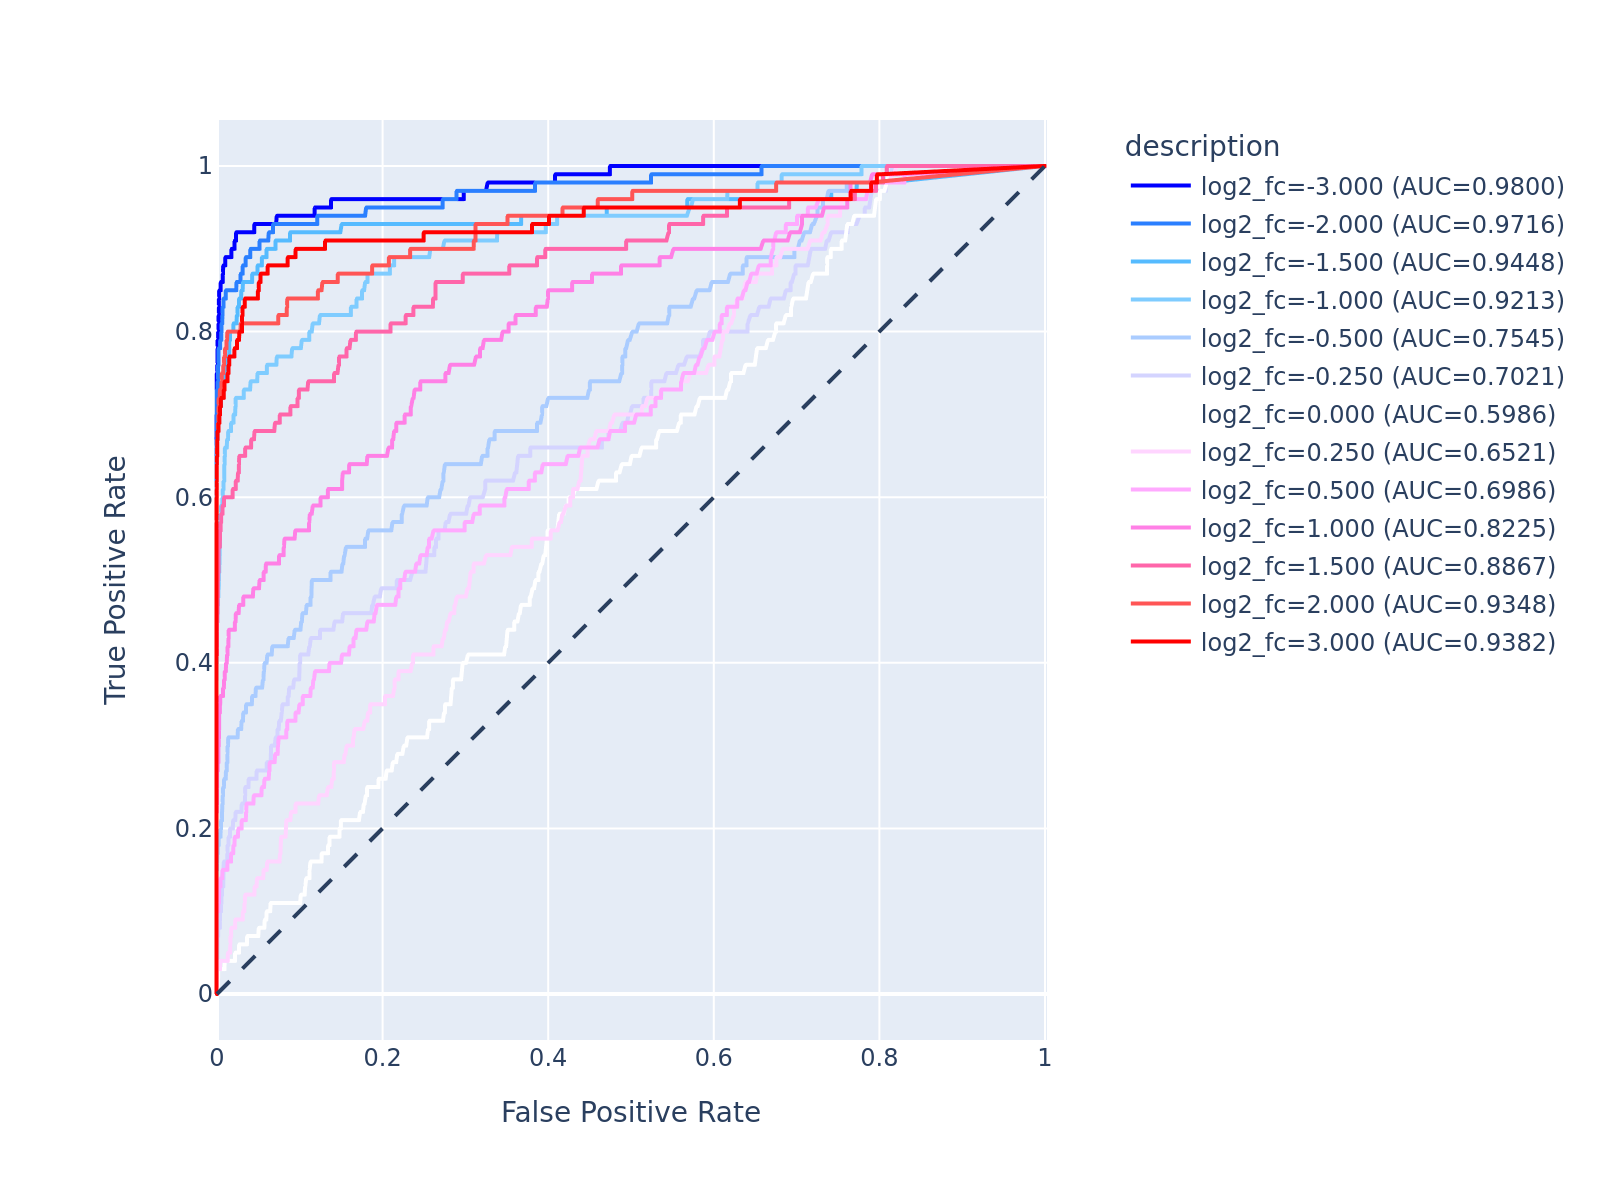

In [347]:
fig = px.line(
    df_roc,
    x="fpr",
    y="tpr",
    color="description",
    # title=f"ROC Curve (AUC={auc(fpr, tpr):.4f})",
    labels=dict(fpr="False Positive Rate", tpr="True Positive Rate"),
    width=800,
    height=600,
    color_discrete_sequence=colors,
    # hover_data=["thresholds"],
)
fig.add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain="domain")
fig.show(renderer="png", scale=2)

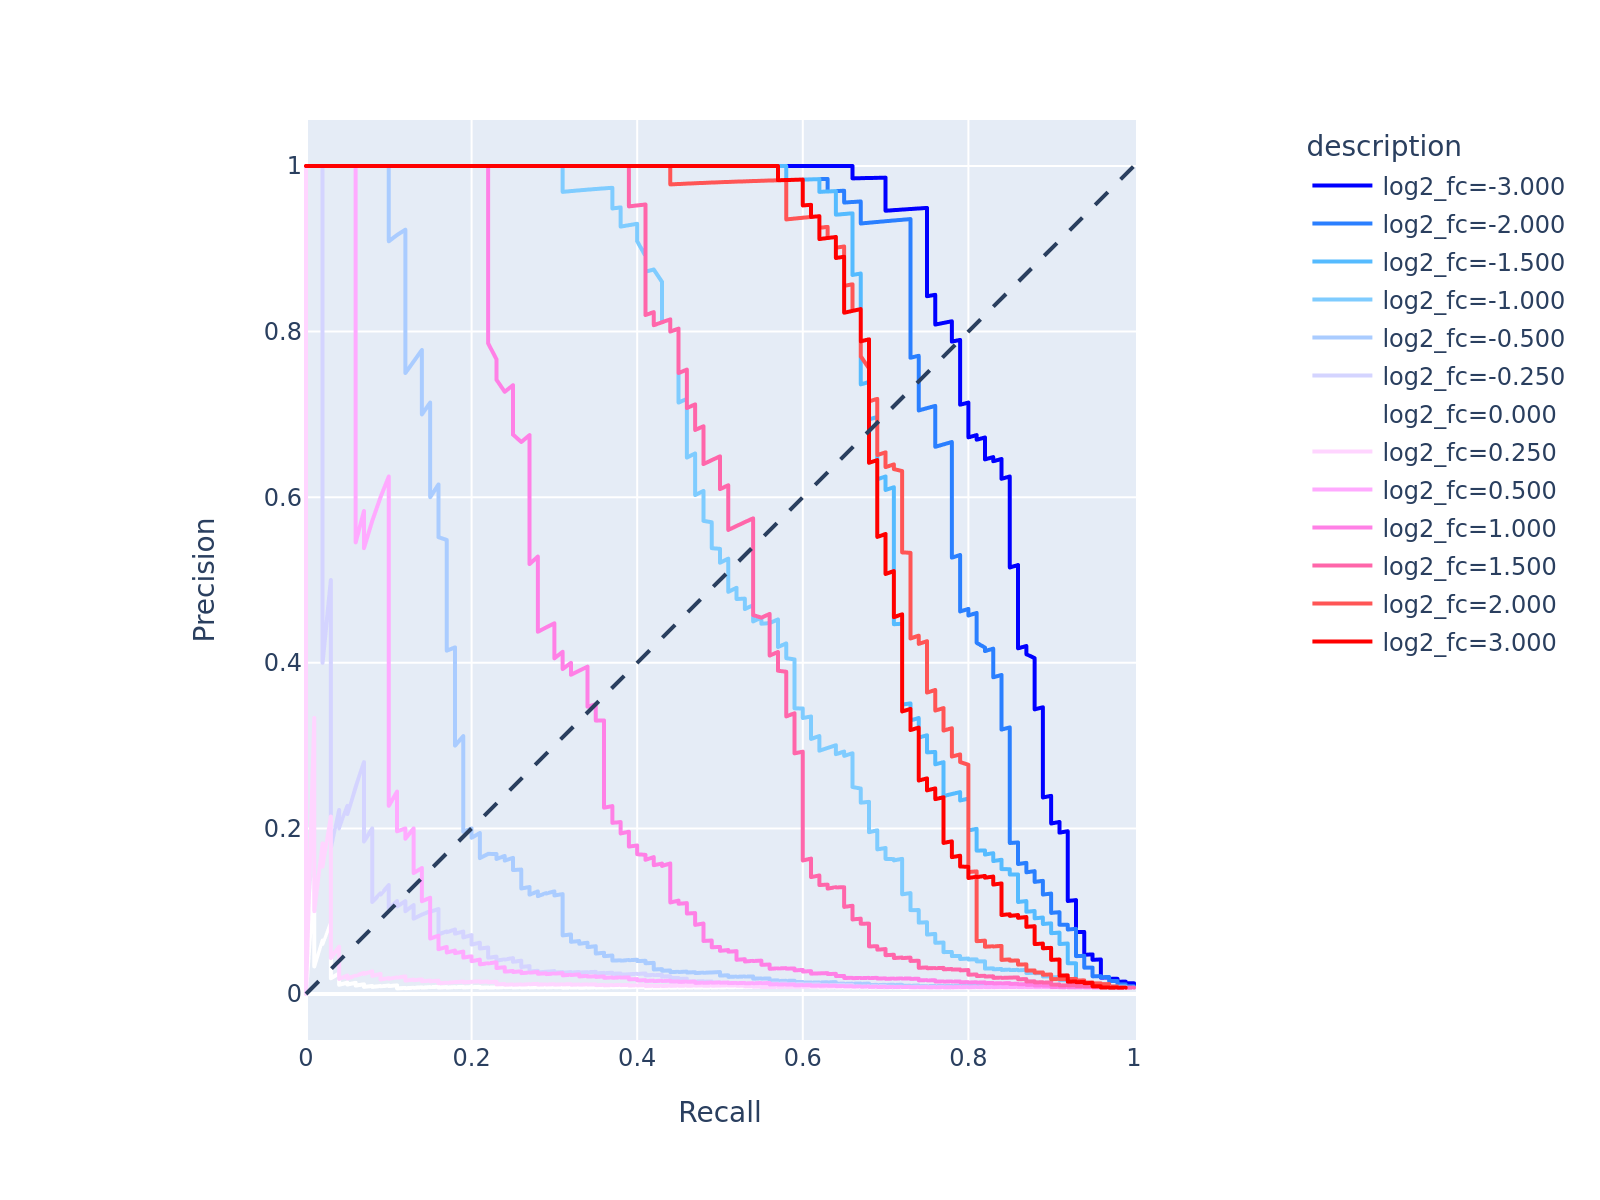

In [348]:
fig = px.line(
    df_pr,
    x="recall",
    y="precision",
    color="description",
    labels=dict(recall="Recall", precision="Precision"),
    width=800,
    height=600,
    color_discrete_sequence=colors,
    # hover_data={"Threshold of -log10(pval)": thresholds},
)
fig.add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain="domain")
fig.show(renderer="png", scale=2)

In [ ]:
path_image = path_root / "figures" / "volcanos_facets_vertical.png"

fig.write_image(path_image, scale=2)

print(path_image)
print(f"gsutil cp {path_image} ~/Downloads/{path_root.name}")